In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from splinx.spline import *
import jax.numpy as jnp
from jax import config, grad

In [16]:
config.update('jax_platform_name', 'cpu')

(2, 11)


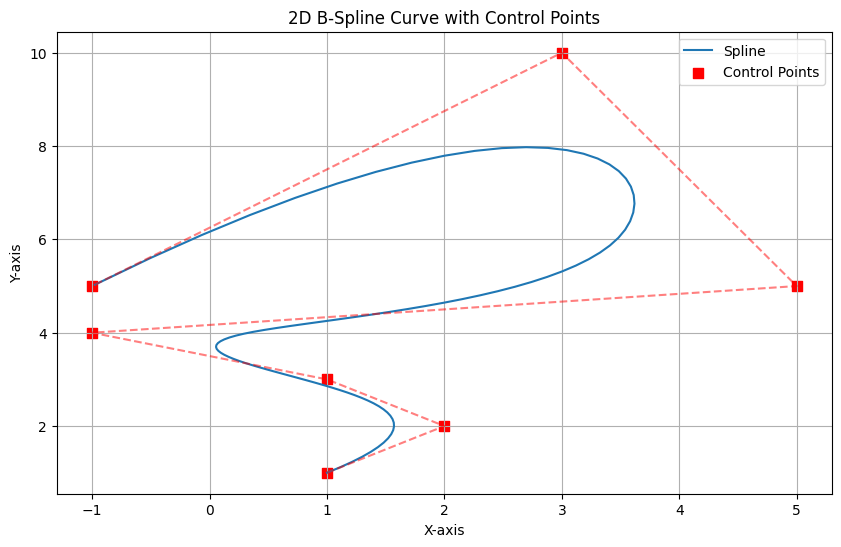

In [4]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, .999, num_sample)[None, :], 2, axis=0)

coef = jnp.array([[1,2,1,-1,5,3,-1],
                  [1,2,3,4,5,10,5]])
num_grid_interval = coef.shape[1] - k
grids = jnp.einsum('i,j->ij', jnp.ones(2,), jnp.linspace(-1,1,num_grid_interval+1))
extended_grids = extend_grid(grids, k, clamp=True)

print(extended_grids.shape)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

plt.figure(figsize=(10, 6))
plt.plot(y_eval[0, :], y_eval[1, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
plt.scatter(ctrl_points_x, ctrl_points_y, marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(ctrl_points_x, ctrl_points_y, 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

[[0.]
 [0.]]


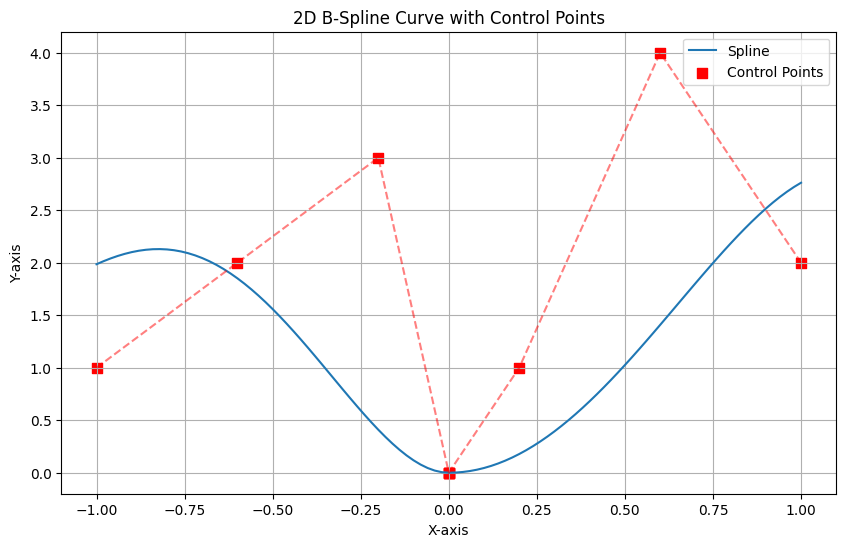

In [21]:
num_sample = 100
k = 4
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
# grid_around_zero = jnp.tile(jnp.array([-.0,0,.0]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)
# print(coef2curve(jnp.array([[-.00001,0.,.00001],[-.00001,0.,.00001]]), extended_grids, coef, k=k))
print(coef2curve(jnp.array([[0.],[0.]]), extended_grids, coef, k=k))
# print(y_eval)

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')


# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1]-k))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

## How to define derivative of spline?

[[0.]
 [0.]]


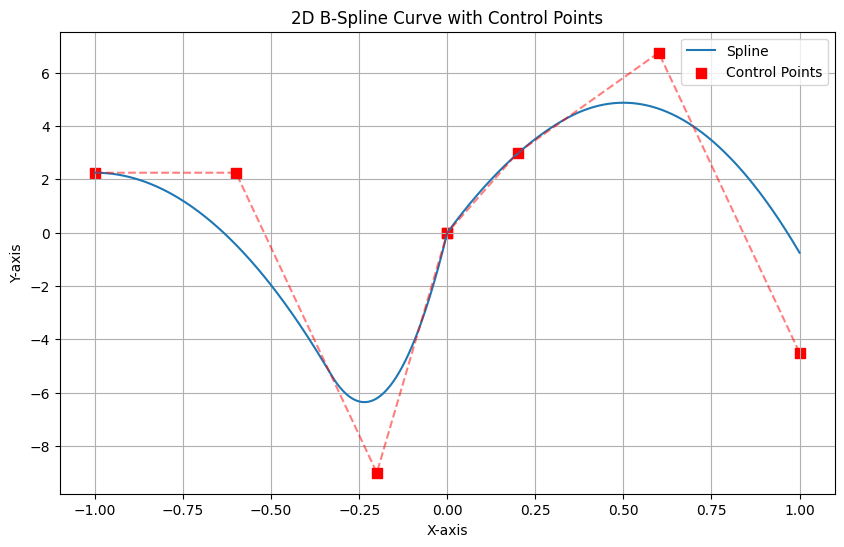

In [6]:
num_sample = 1000
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grid_around_zero = jnp.tile(jnp.array([-.0,0,.0]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

coef = (coef[:,1:] - coef[:,:-1]) * k / (extended_grids[:,k+1:-1] - extended_grids[:,1:-(k+1)])

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids[:,1:-1], coef, k=k-1)
print(coef2curve(jnp.array([[0.],[0.]]), extended_grids[:,:-1], coef, k=k))

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1] - k + 1))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k-1)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring f

(1, 17) (1, 11)


'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring f

[[0.]
 [0.]]


'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)
'+ptx84' is not a recognized feature for this target (ignoring feature)


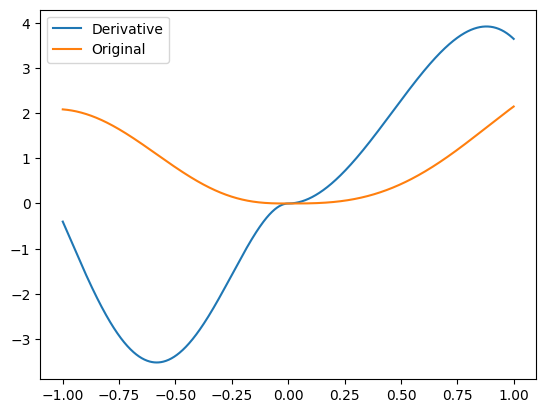

In [29]:
num_sample = 1000
k = 5
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)
print(extended_grids.shape, coef.shape)
# y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

y_eval = spline_derivative(x_eval, extended_grids, coef, k)
print(spline_derivative(jnp.array([[0.],[0.]]), extended_grids, coef, k))
plt.plot(x_eval[0, :], y_eval[0, :], label='Derivative')

y_eval = coef2curve(x_eval, extended_grids, coef, k)
plt.plot(x_eval[0, :], y_eval[0, :], label='Original')

plt.legend()

In [30]:
grad(curve2coef, argnums=1)(jnp.array([0.0,0.0]), extended_grids, coef, k)

IndexError: Too many indices for array: 2 non-None/Ellipsis indices for dim 1.

In [59]:
jnp.linalg.norm(jnp.array([0,0]))

Array(0., dtype=float32)

In [25]:
def spline_derivative(x_eval, grid, coef, k):
    # Implement the function to compute the derivative of B-spline basis wrt x_eval here
    numerator = coef[:, 1:] - coef[:, :-1]
    denominator = grid[:, k+1:-1] - grid[:, 1:-(k+1)]
    new_coef = numerator * k / denominator
    
    # 0/0 defaults to 0 as defined here: https://public.vrac.iastate.edu/~oliver/courses/me625/week5b.pdf
    is_zero_over_zero = (numerator == 0.0) & (denominator == 0.0)

    new_coef = jnp.where(is_zero_over_zero & jnp.isnan(new_coef), 0.0, new_coef)

    y_eval = coef2curve(x_eval, grid[:,1:-1], new_coef, k-1)

    return y_eval

5
(5, 15) (5, 11)


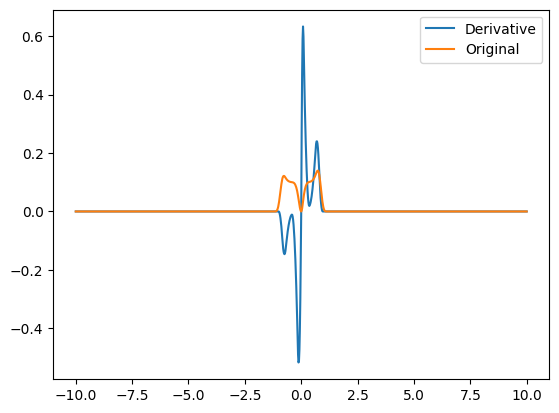

In [50]:
config.update('jax_platform_name', 'cpu')

num_sample = 1000
k = 3
spline_num = 2

grids = jnp.array([[-1.2432438 , -0.746161  , -0.24907821,  0.24800467,  0.7450874 ,
         1.2421702 ],
       [-3.0355766 , -1.6791472 , -0.3227179 ,  1.0337117 ,  2.3901408 ,
         3.7465699 ],
       [-0.6768435 , -0.41648528, -0.15612704,  0.10423124,  0.36458945,
         0.62494767],
       [-1.4936088 , -0.88528967, -0.2769705 ,  0.33134866,  0.9396678 ,
         1.5479869 ],
       [-2.3746228 , -1.4278635 , -0.48110414,  0.46565533,  1.4124146 ,
         2.3591738 ]])

x_eval = jnp.repeat(jnp.linspace(-10, 10, num_sample+1)[None, :], coef.shape[0], axis=0)

coef = jnp.array([[0.12477916, 0.09934137, 0.09965841, 0.09914184, 0.09913632,
        0.09970728, 0.09972807, 0.12547413],
       [0.4516206 , 0.09930059, 0.09952505, 0.09899504, 0.09920763,
        0.09959827, 0.096895  , 0.44445702],
       [0.13964827, 0.10375783, 0.09953242, 0.0989156 , 0.09893472,
        0.09960993, 0.10770113, 0.16667949],
       [0.16132084, 0.1452285 , 0.09982439, 0.09861059, 0.09891745,
        0.09982572, 0.13004777, 0.21586323],
       [0.27699497, 0.12236702, 0.09983233, 0.09868665, 0.09892043,
        0.099839  , 0.12581861, 0.21602975]])

coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
print(num_grid_interval)
# grids = jnp.einsum('i,j->ij', jnp.ones(coef.shape[0],), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)
print(extended_grids.shape, coef.shape)
# y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

y_eval = spline_derivative(x_eval, extended_grids, coef, k)
# print(spline_derivative(jnp.array([[0.],[0.]]), extended_grids, coef, k))
plt.plot(x_eval[spline_num, :], y_eval[spline_num, :], label='Derivative')

y_eval = coef2curve(x_eval, extended_grids, coef, k)
plt.plot(x_eval[spline_num, :], y_eval[spline_num, :], label='Original')

plt.legend()